In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("C:\\Users\\Kuku Sharma\\Downloads\\Rename.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
print(f'The total values in Season: {df.season.value_counts()} \n\nThe total values in Weather: {df.weather.value_counts()} \n\nTotal values in workingday: {df.workingday.value_counts()}')


The total values in Season: season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64 

The total values in Weather: weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64 

Total values in workingday: workingday
1    7412
0    3474
Name: count, dtype: int64


In [8]:
def convertSeason(season):
    if season==1:
        return 'spring'
    if season==2:
        return 'summer'
    if season==3:
        return 'fall'
    else:
        return 'winter'

In [9]:
df['season'] = df['season'].apply(lambda season: convertSeason(season))

In [10]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32


In [11]:
df['datetime']  = pd.to_datetime(df['datetime'], errors='coerce')
df_hrs = df.groupby(df['datetime'].dt.hour).agg(cycle_average_rented=('count', 'mean')).reset_index()
df_hrs

,datetime,cycle_average_rented
0,0,55.138462
1,1,33.859031
2,2,22.899554
3,3,11.757506
4,4,6.407240
5,5,19.767699
6,6,76.259341
7,7,213.116484
8,8,362.769231
9,9,221.780220


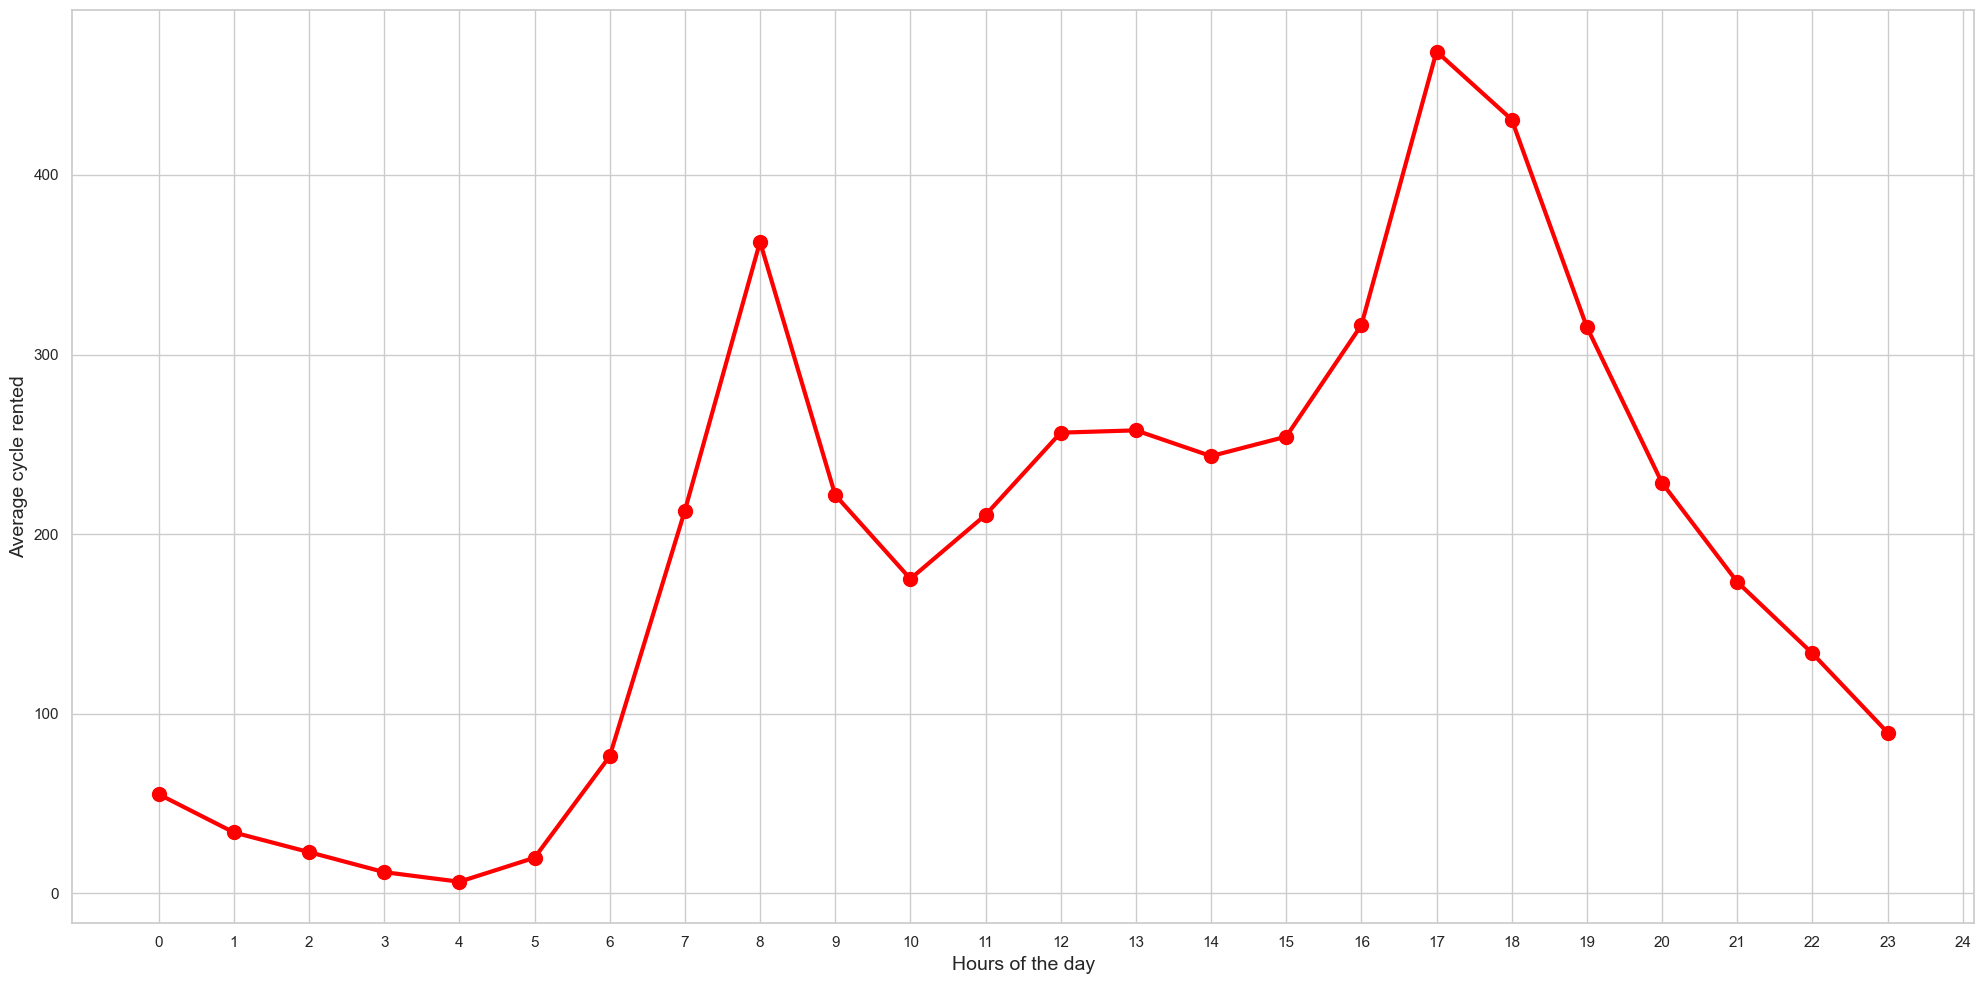

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 10))
plt.plot(df_hrs['datetime'], df_hrs['cycle_average_rented'], color='red', linestyle='-', marker='o', markersize=10, linewidth=3)
plt.xlabel('Hours of the day', fontsize=14)
plt.ylabel('Average cycle rented', fontsize=14)
plt.xticks(range(0, 25))
# plt.title()
plt.tight_layout()

In [13]:
# Group the different season counts to check which season has the largest rented for cycle

season_group = df.groupby(df['season']).agg(count=('count', 'sum')).reset_index()

In [14]:
season_group

,season,count
0,fall,640662
1,spring,312498
2,summer,588282
3,winter,544034


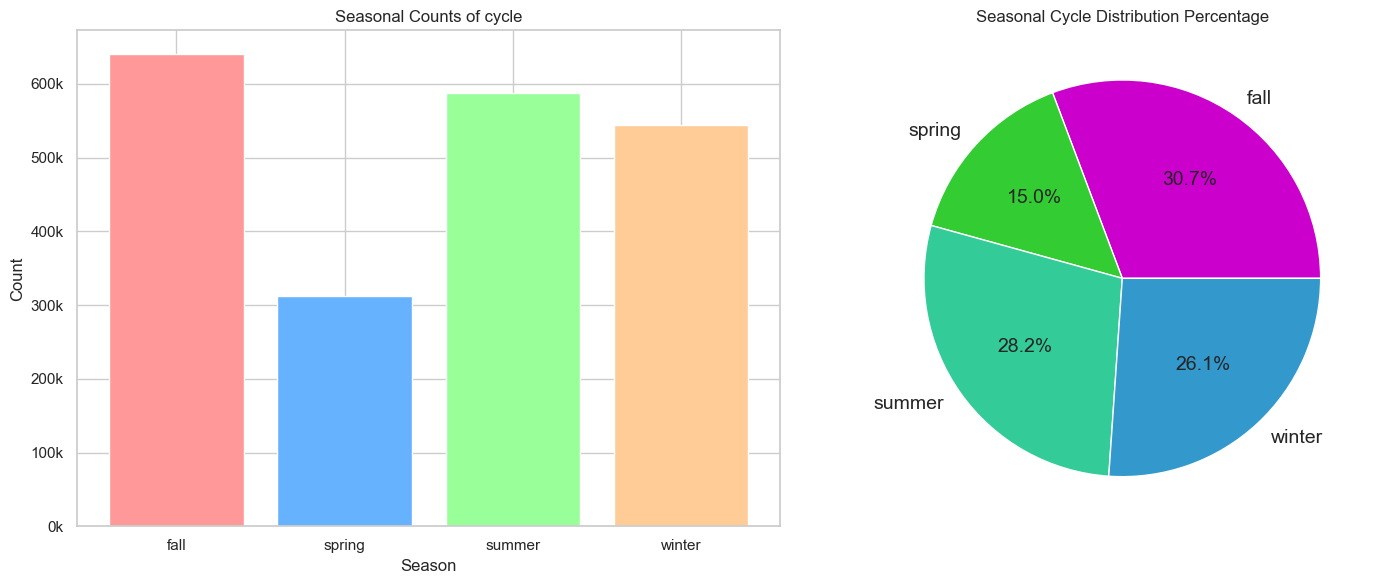

In [15]:
from matplotlib.ticker import FuncFormatter

x_label = season_group['season']
y_label = season_group['count']
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC98']
clrs = ['#CC00CC', '#33CC33', '#33CC99', '#3399CC']

def thousands_formatter(x, pos):
    return f'{int(x/1000)}k'
    
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0].bar(x_label, y_label, color=colors)
axes[0].set_title('Seasonal Counts of cycle')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Count')
axes[0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

axes[1].pie(y_label, labels=x_label, autopct='%1.1f%%', colors=clrs, textprops={'fontsize':14})
axes[1].set_title('Seasonal Cycle Distribution Percentage')
plt.tight_layout()
plt.show()



Insights--
In this I find that the number of cycle rented in Spring is 15%, winter 26.1%, fall 30.7%, summer 28.2%.
In Spring there is less cycle rented.

In [16]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32


In [17]:
workingday_cycleRent = df.groupby(df['workingday']).agg(cycle_rent_workingday=('count','sum')).reset_index()
workingday_cycleRent

,workingday,cycle_rent_workingday
0,0,654872
1,1,1430604


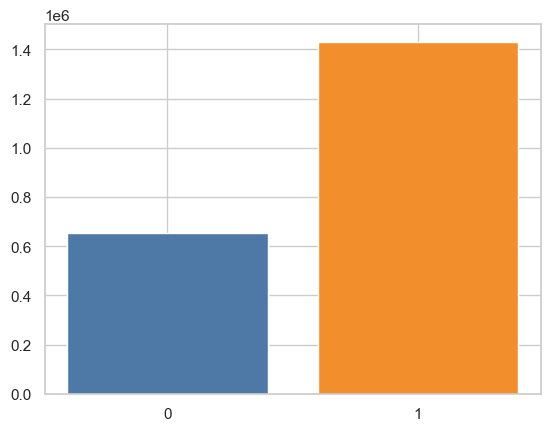

In [18]:
x_labels = workingday_cycleRent['workingday']
y_labels = workingday_cycleRent['cycle_rent_workingday']

plt.bar(x_labels, y_labels, color=['#4E79A7', '#F28E2B'])
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()

Insights
I found that on working days the should be rented most as compared to non-working days.

In [19]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [20]:
# Group the workingday on which most of the cycle rented.

cycleRent_workingday = df.groupby(['workingday']).agg(cycleRent_workingday=('count', 'sum')).reset_index()
cycleRent_workingday

,workingday,cycleRent_workingday
0,0,654872
1,1,1430604


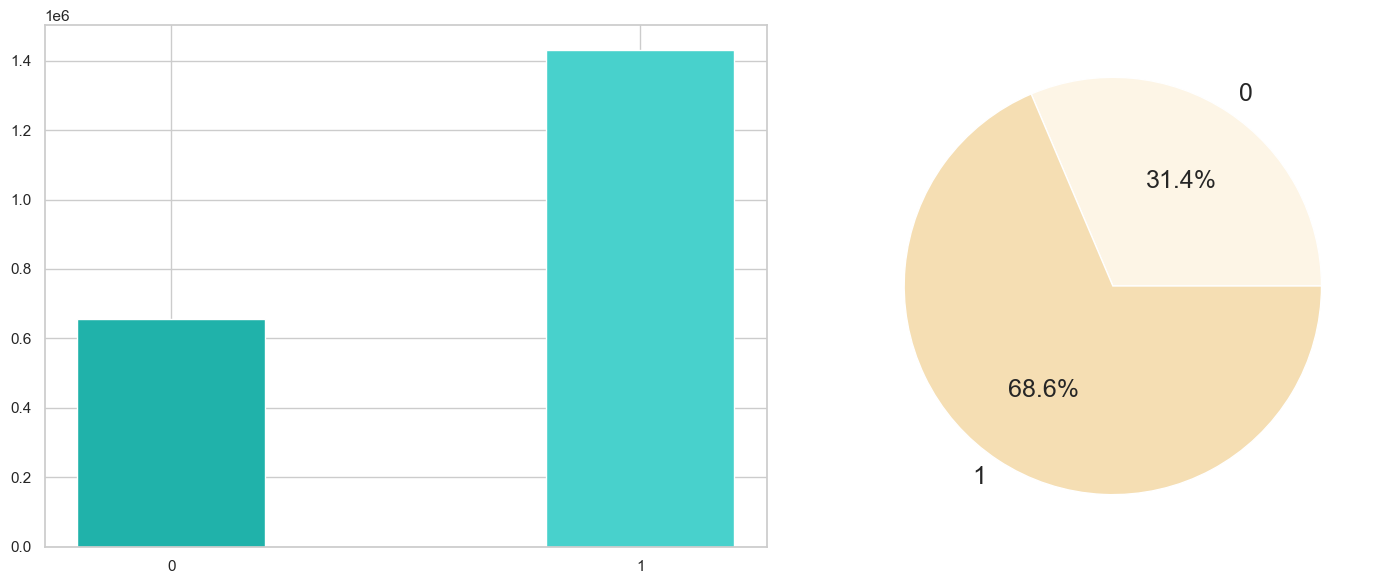

In [21]:
x_axis = cycleRent_workingday['workingday']
y_axis = cycleRent_workingday['cycleRent_workingday']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].bar(x_axis, y_axis, color=['lightseagreen', 'mediumturquoise'], width=0.4)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0', '1'])
axes[1].pie(y_axis, labels=x_axis, autopct='%1.1f%%', textprops={'fontsize':18}, colors=['oldlace', 'wheat'])
plt.tight_layout()
plt.show()

Insight of the data
While performing visualisation on workingday, I got that most of the cycles rented on working day[1]. Around 68.6% rented on working day and 31.4% on non-working day.

In [22]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40


In [23]:
weatherCycleRent = df.groupby(['weather']).agg(cycleRentWeather=('count', 'sum')).reset_index() 
weatherCycleRent

,weather,cycleRentWeather
0,1,1476063
1,2,507160
2,3,102089
3,4,164


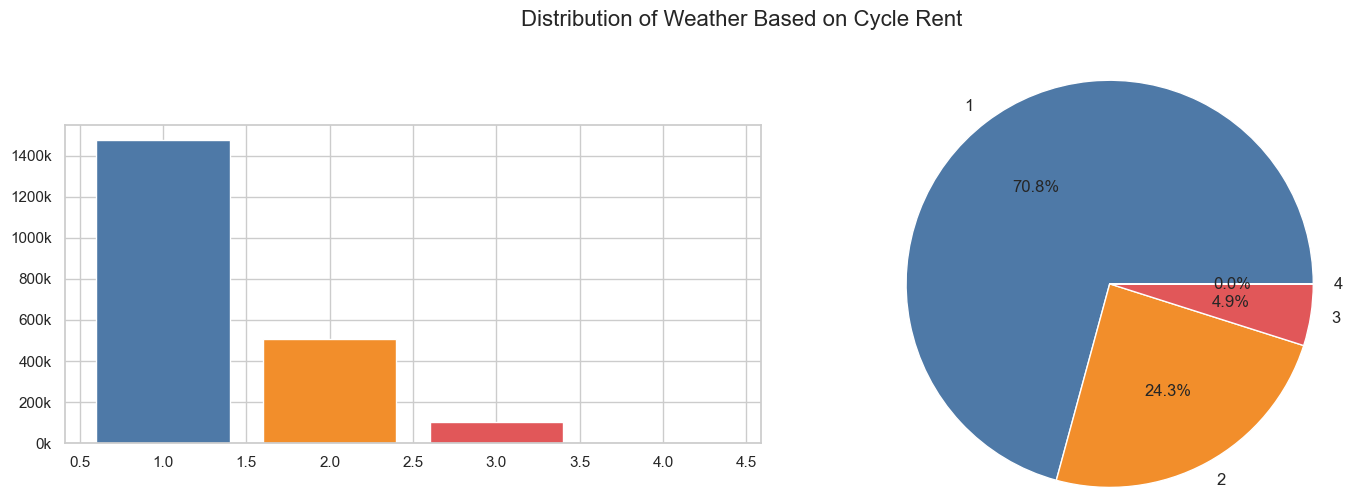

In [24]:
x = weatherCycleRent['weather']
y = weatherCycleRent['cycleRentWeather']
labels=[1, 2, 3, 4]
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k'
    
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].bar(x, y, color = ['#4E79A7', '#F28E2B', '#E15759'])
axes[0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
axes[1].pie(y, labels=labels, autopct='%1.1f%%', textprops={'fontsize':12},colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2'], radius=1.6)

fig.suptitle("Distribution of Weather Based on Cycle Rent", fontsize=16, y=1.01, ha='center')
plt.tight_layout(rect=[0, 0, 1, 1]) 
plt.show()

Insight-
In this I get the information about the weather, in which weather the cycles are rented most. In weather[1] there is 70.8%, weather[2] there is 24.3%, 
weather[3] there is 4.9%, weather[4] is 0.0%.

In [25]:
df.head(3) 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32


In [26]:

def minVal(*data):
    ans=[]
    for i in data:
        ans= df[i].min()
        
    return ans



In [27]:
def maxVal(*data):
    ans=[]
    for i in data:
        ans= df[i].max()
        
    return ans



In [28]:
colus = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
min_val = minVal(colus)

for col, val in min_val.items():
    print(f"Minimum value of {col} is: {val}")

Minimum value of temp is: 0.82
Minimum value of atemp is: 0.76
Minimum value of humidity is: 0.0
Minimum value of windspeed is: 0.0
Minimum value of casual is: 0.0
Minimum value of registered is: 0.0


In [29]:
max_val = maxVal(colus)
for col, val in max_val.items():
    print(f"Minimum value of {col} is: {val}")

Minimum value of temp is: 41.0
Minimum value of atemp is: 45.455
Minimum value of humidity is: 100.0
Minimum value of windspeed is: 56.9969
Minimum value of casual is: 367.0
Minimum value of registered is: 886.0


In this we are going to check the Distribution of our data. So we find that it not follows the normal distribution so we have to apply some Transformations to make it Normal.

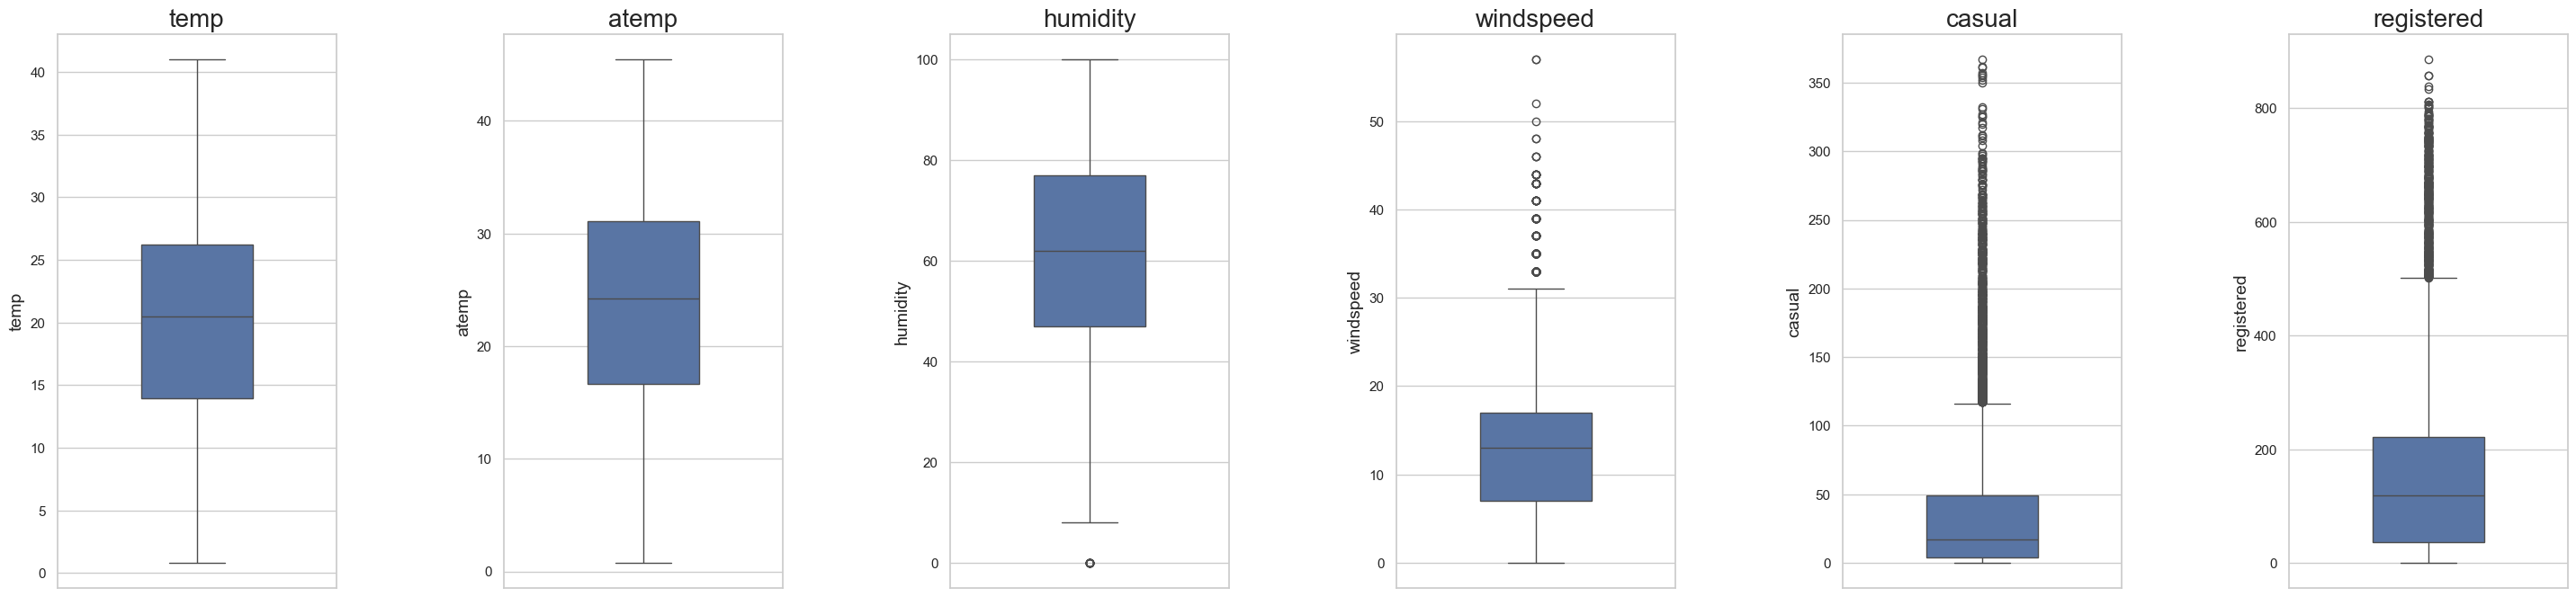

In [30]:
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
fig, axes = plt.subplots(1, 6, figsize=(36, 8))
for i, axs in enumerate(axes):
    sns.boxplot(df[cols[i]], ax=axs, width=0.4)
    axs.set_title(cols[i], fontsize=20)
    axs.set_ylabel(cols[i], fontsize=14)
    plt.subplots_adjust(wspace=0.6)

In [31]:
def detect_outliers(*data):
    outliers_cnt={}
    for i in data[0]:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
        outliers_cnt[i]= len(outliers)
    
    return outliers_cnt


In [32]:
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
outliers_detect = detect_outliers(cols)

for col, cnt in outliers_detect.items():
    print(f'Column {col} has {cnt} outliers')

Column temp has 0 outliers
Column atemp has 0 outliers
Column humidity has 22 outliers
Column windspeed has 227 outliers
Column casual has 749 outliers
Column registered has 423 outliers


# Plotting the graph for certain columns to check the Distribution

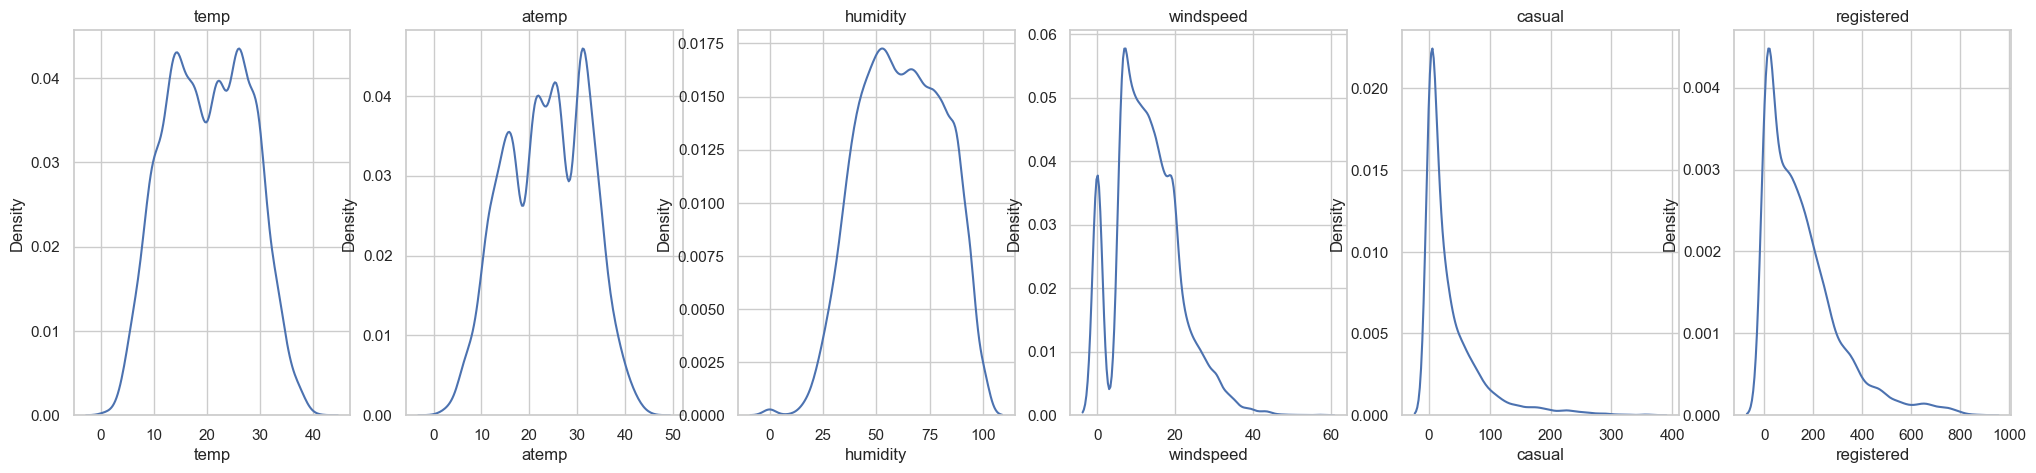

In [33]:
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
fig, axes = plt.subplots(1, 6, figsize=(25, 5))
for i, axs in enumerate(axes):
    sns.kdeplot(df[cols[i]], ax=axs)
    axs.set_title(cols[i])

Insight-----
While Appying outlier detection I found that most of the outliers are find in 'Windspeed', 'Casual', 'Registered' and least outliers column would be 'humidity'

# Plotting QQ-plot for checking the distribution

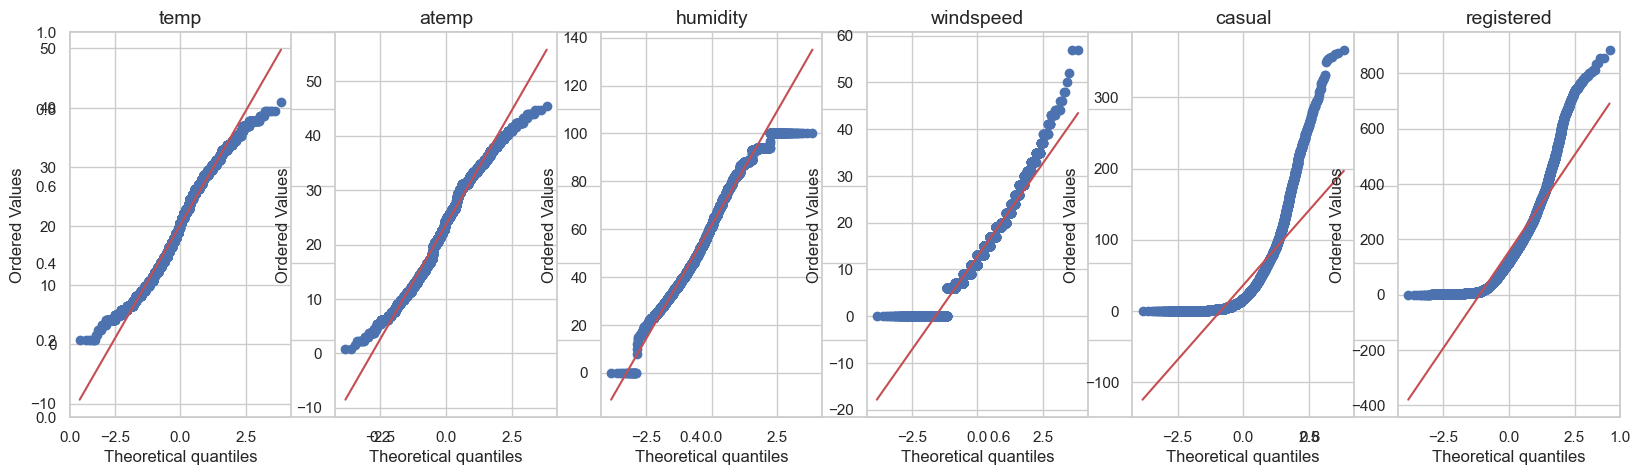

In [34]:
import scipy.stats as stats
cl = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
plt.subplots(figsize=(20, 5))
for i, col in enumerate(cl):
    plt.subplot(1, len(cl), i+1)
    stats.probplot(df[col], dist='norm', plot=plt)
    plt.title(f'{col}', fontsize=14)

#With the help of these visualisation it seems that the data does not follow the Normal Distribution.

# Bivariate Analysis

Distribution of count of rented bikes across working day

C:\Users\Kuku Sharma\AppData\Local\Temp\ipykernel_49372\1364123052.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='count', x='workingday', palette=['#d0bbff', '#fffea3'])


Text(0, 0.5, 'Count')

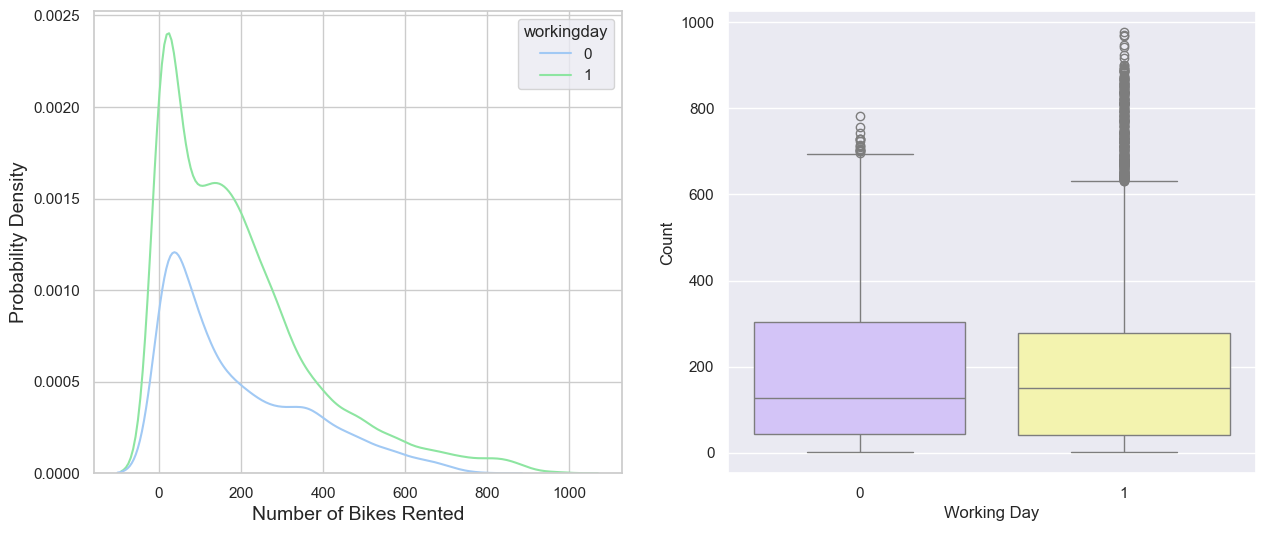

In [35]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.set_style('darkgrid')
sns.kdeplot(data=df, x='count', hue='workingday', palette=['#a1c9f4', '#8de5a1'])
plt.xlabel('Number of Bikes Rented', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(data=df, y='count', x='workingday', palette=['#d0bbff', '#fffea3'])
plt.xlabel('Working Day')
plt.ylabel('Count')

While plotting the distribution of Rented bikes accross the working day it shows that the most of the cycle rented on the working day. We will do some testing to check working day has an effect on rented bikes or not 

# Distribution of bikes rented on different Season

C:\Users\Kuku Sharma\AppData\Local\Temp\ipykernel_49372\1074322310.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='count', x='season', palette=['#B22222', '#90EE90', '#1E3A8A', '#FF69B4'])


Text(0, 0.5, 'Count')

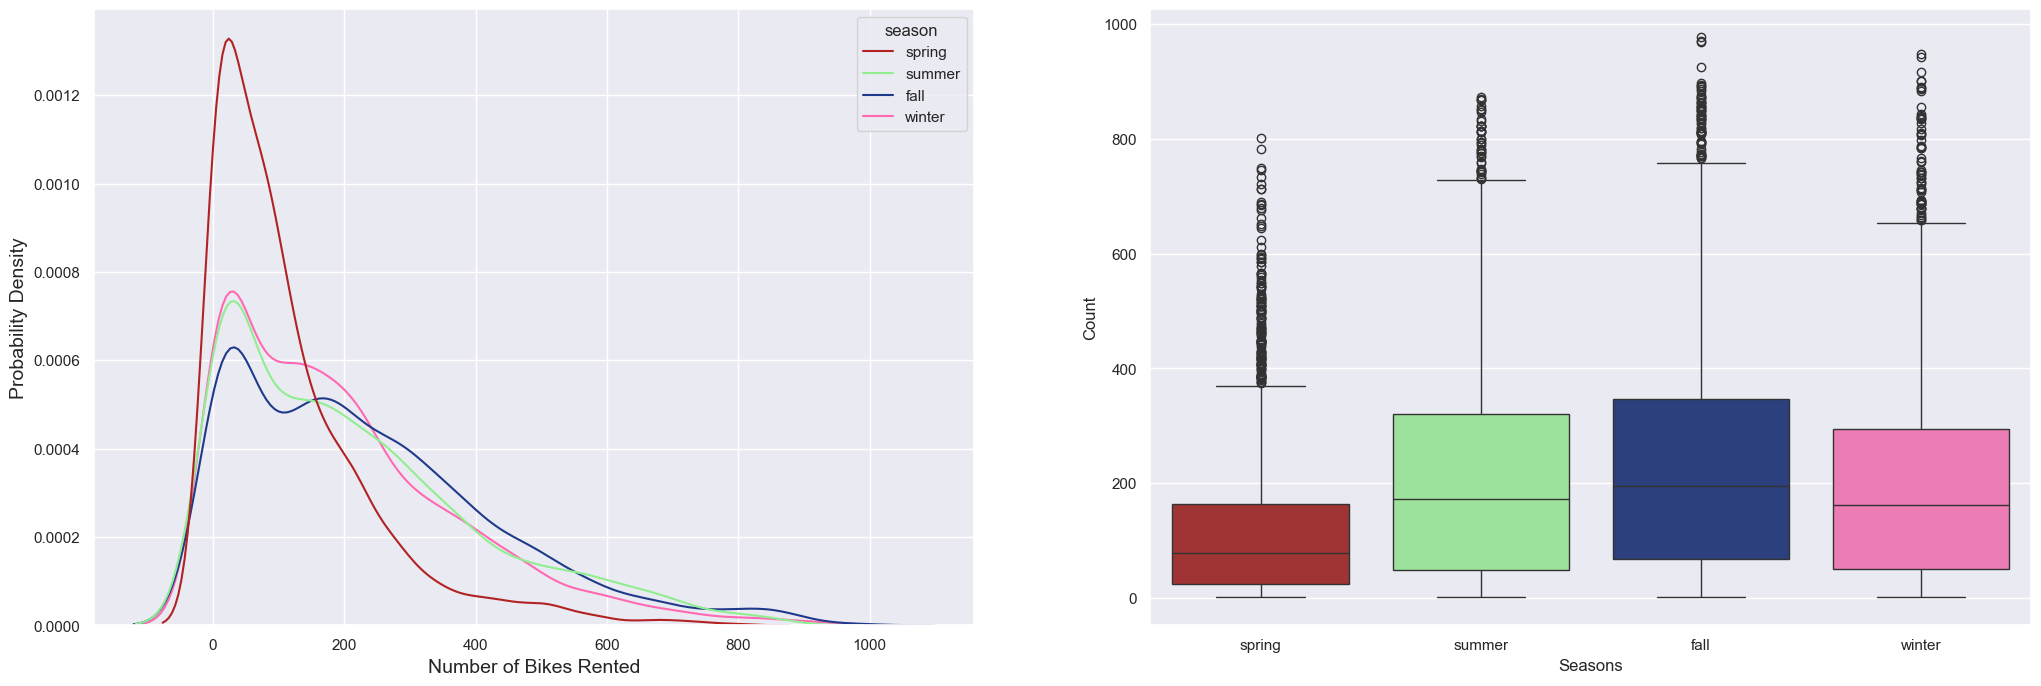

In [36]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
sns.set_style('darkgrid')
sns.kdeplot(data=df, x='count', hue='season', palette=['#B22222', '#90EE90', '#1E3A8A', '#FF69B4'])
plt.xlabel('Number of Bikes Rented', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(data=df, y='count', x='season', palette=['#B22222', '#90EE90', '#1E3A8A', '#FF69B4'])

plt.xlabel('Seasons')
plt.ylabel('Count')

The visualisations show the distribution of rented bikes accross different seasons. The probability of rented bikes would be greater on spring season. In fall season there is significantly less rented bikes as compared to other season

In [37]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32


# Distribution of bikes rented on holiday

C:\Users\Kuku Sharma\AppData\Local\Temp\ipykernel_49372\145615358.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='count', x='holiday', palette=['#B22222', '#1E3A8A'])


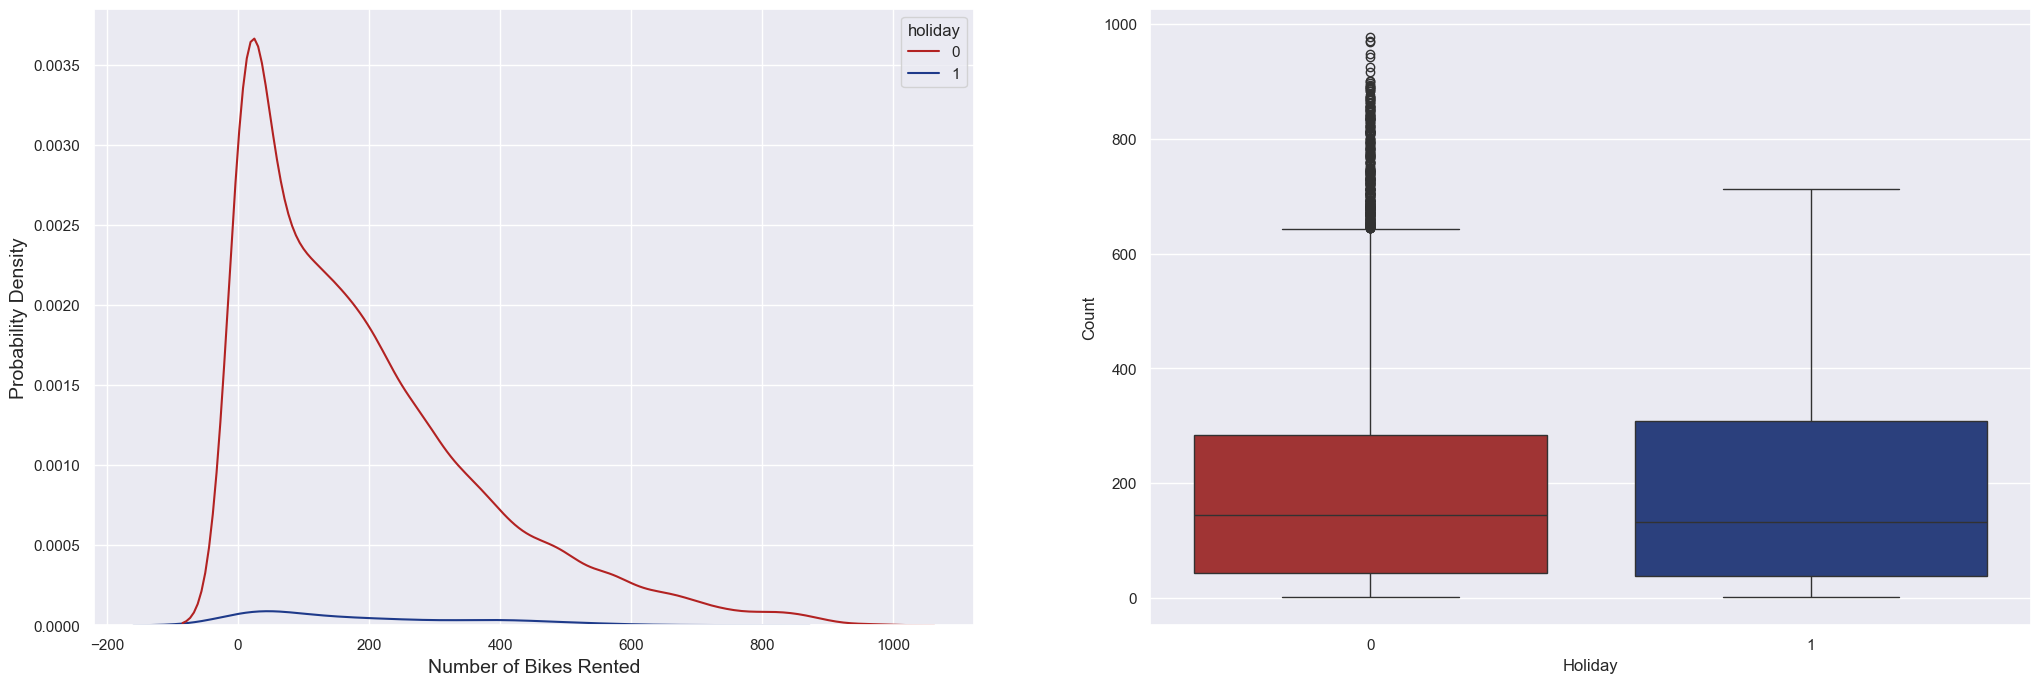

In [38]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
sns.set_style('darkgrid')
sns.kdeplot(data=df, x='count', hue='holiday', palette=['#B22222', '#1E3A8A'])
plt.xlabel('Number of Bikes Rented', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(data=df, y='count', x='holiday', palette=['#B22222', '#1E3A8A'])

plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='season', ylabel='humidity'>

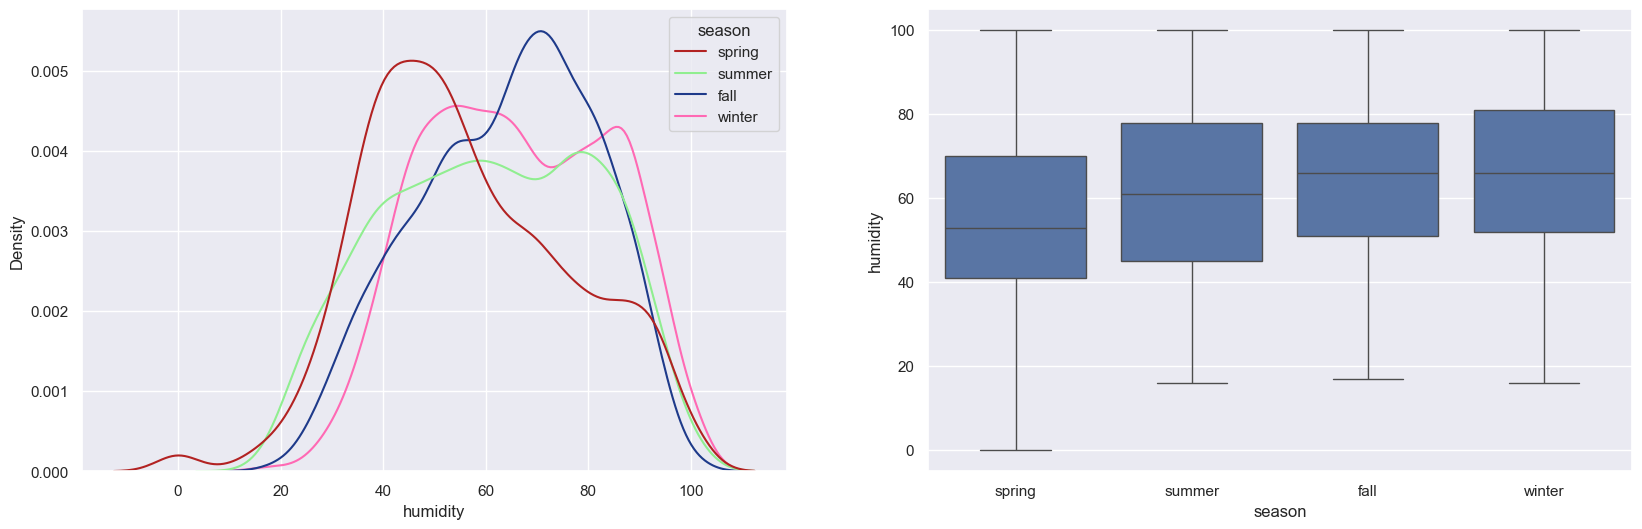

In [39]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2, 1)
sns.set_style('darkgrid')
sns.kdeplot(data=df, x='humidity', hue='season', palette=['#B22222', '#90EE90', '#1E3A8A', '#FF69B4'])
plt.subplot(1,2, 2)
sns.boxplot(data=df, y='humidity', x='season')

While visiualising this graph I find most of the bikes rented if the humidity level is more than 20. MOstly it shows Normally distribution. There is no outliers in this visualisation

In [40]:
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,spring,0,0,1,9.84,14.395,81,0.0,3,13,16


# Hypothesis Testing Part

H0 : Working day does not have an effect on number of cycles rented
Ha: Working day does have an effect on number of cycles rented

In [41]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40


In [42]:
workingday_sample = df[df['workingday']==1]['count'].sample(500)
non_workingday_sample = df[df['workingday']==0]['count'].sample(500)

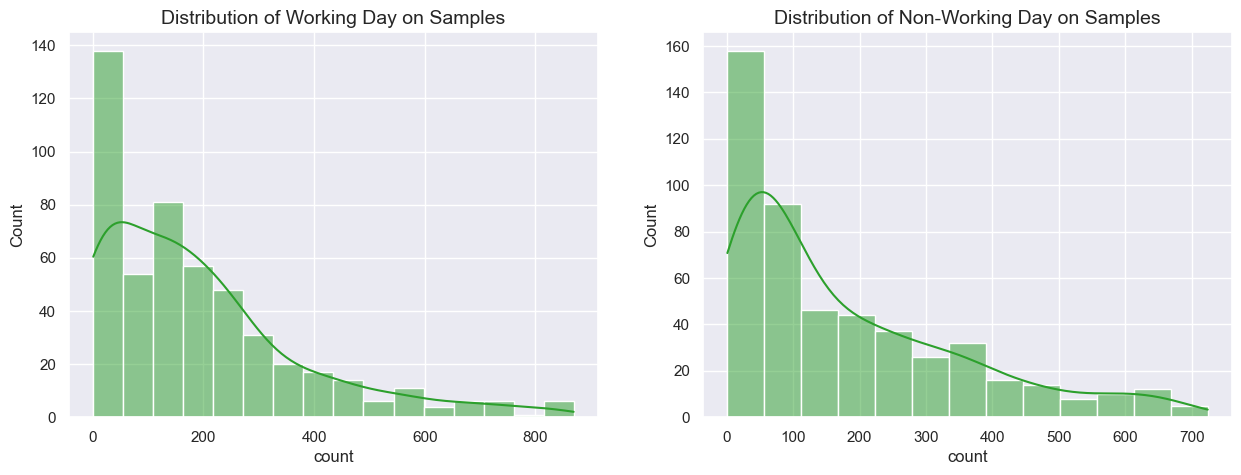

In [43]:
fig, axes= plt.subplots(1, 2, figsize=(15, 5))
sns.set_style('darkgrid')
sns.histplot(workingday_sample, kde=True, color = '#2ca02c', ax=axes[0])
axes[0].set_title('Distribution of Working Day on Samples', fontsize=14)

sns.histplot(non_workingday_sample, kde=True, color = '#2ca02c', ax=axes[1])
axes[1].set_title('Distribution of Non-Working Day on Samples', fontsize=14)

plt.show()

Visualizing the data shows that the counts for working and non-working days are not normally distributed. To address this, we will apply a log transformation to make the distribution closer to normal.

# Apply Transformer to make it Normal Distribution

In [44]:
workingday_sample_transformed = np.log(workingday_sample)
non_workingday_sample_transformed = np.log(non_workingday_sample)


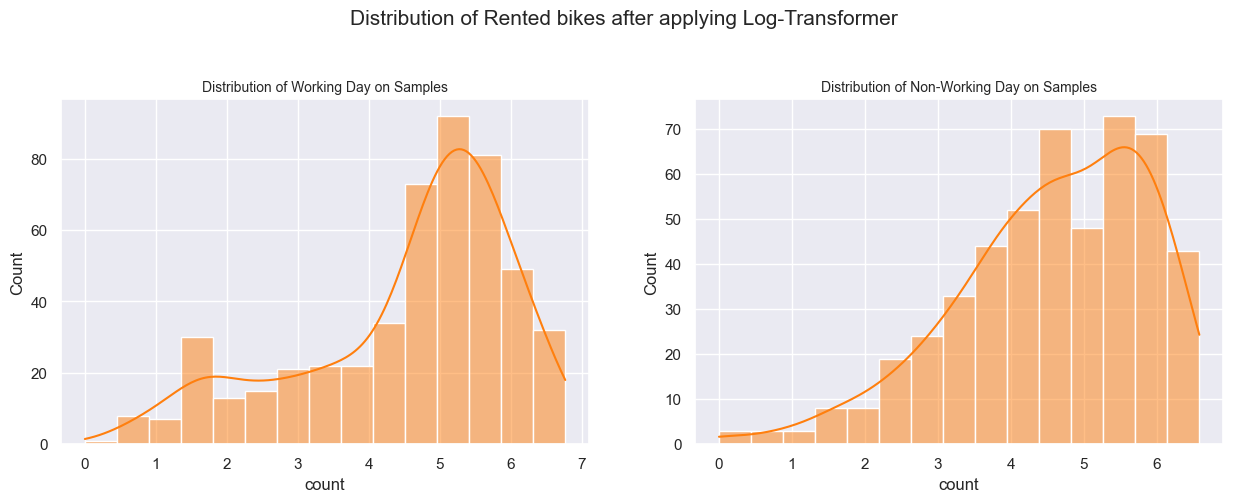

In [45]:
fig, axes= plt.subplots(1, 2, figsize=(15, 5))
sns.set_style('darkgrid')
sns.histplot(workingday_sample_transformed, kde=True, color = '#ff7f0e', ax=axes[0])
axes[0].set_title('Distribution of Working Day on Samples', fontsize=10)

sns.histplot(non_workingday_sample_transformed, kde=True, color = '#ff7f0e', ax=axes[1])
axes[1].set_title('Distribution of Non-Working Day on Samples', fontsize=10)

plt.suptitle('Distribution of Rented bikes after applying Log-Transformer', fontsize=15)
plt.subplots_adjust(top=0.8)
plt.show()

After applying the transformation, there is an improvement, but we will perform a Shapiro test to confirm if the data follows a normal distribution.

Conducting Shapiro test to check the Normality

In [46]:
# Shapiro test to perform on Working Days
from scipy.stats import shapiro
test_stat, p_value = shapiro(workingday_sample_transformed)
print('Ttest stat: ', test_stat)
print('P value is: ', p_value)
p = 0.05
if p_value< p:
    print('Reject Null Hypothesis:: Samples are not normally distributed')
else:
    print('Failed to reject Null Hypothesis:: Samples are normally distributed')



Ttest stat:  0.9044251953255787
P value is:  3.640825542081647e-17
Reject Null Hypothesis:: Samples are not normally distributed


In [47]:
# Shapiro test to perform on Non-Working Days
from scipy.stats import shapiro
test_stat, p_value = shapiro(non_workingday_sample_transformed)
print('Ttest stat: ', test_stat)
print('P value is: ', p_value)
p = 0.05
if p_value< p:
    print('Reject Null Hypothesis:: Samples are not normally distributed')
else:
    print('Failed to reject Null Hypothesis:: Samples are normally distributed')



Ttest stat:  0.9508026872174342
P value is:  7.596254808476536e-12
Reject Null Hypothesis:: Samples are not normally distributed


While performing the test it confirms that the workingday and non-working day is not normally distributed.

In [48]:
from scipy.stats import levene
test_stat, p_value = levene(workingday_sample_transformed, non_workingday_sample_transformed)
print('Tstat: ', test_stat)
print('p-value: ', p_value)
alpha=0.05

if p_value<0.05:
    print('Reject Null Hypothesis:: Variance is not equal')
else:
    print('Failed to reject Null Hypothesis:: Variance is equal')

Tstat:  1.2139271364528428
p-value:  0.27082139486498785
Failed to reject Null Hypothesis:: Variance is equal


After performing all the tests, the data is not normally distributed. However, since the sample size is greater than 30, the t-test remains robust to this violation due to the Central Limit Theorem. Additionally, the assumption of equal variances is satisfied, meeting the criteria for performing the t-test.

H0 : Working day does not have an effect on number of cycles rented.
Ha: Working day does have an effect on number of cycles rented.

In [49]:
t_stat, p_value = ttest_ind(workingday_sample_transformed, non_workingday_sample_transformed, equal_var = True)
print('T-stat: ', t_stat)
print('p_value: ', p_value)

if p_value<0.05:
    print('Working day does not have an effect on number of cycles rented')
else:
    print('Working day does have an effect on number of cycles rented')


T-stat:  -0.16541746168180527
p_value:  0.8686489115432398
Working day does have an effect on number of cycles rented


H0: All the 4 different seasons have equal means
Ha: There is atleast one season that differs significantly from the overall mean of dependent variable.
To perform these tests we have to use ANOVA

In [50]:
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,spring,0,0,1,9.84,14.395,81,0.0,3,13,16


In [51]:
df['season'].value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

In [52]:
df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [53]:
spring_sample = df[df['season']=='spring']['count'].sample(500)
summer_sample = df[df['season']=='summer']['count'].sample(500)
fall_sample = df[df['season']=='fall']['count'].sample(500)
winter_sample = df[df['season']=='winter']['count'].sample(500)

Text(0.5, 1.0, 'Winter Samples')

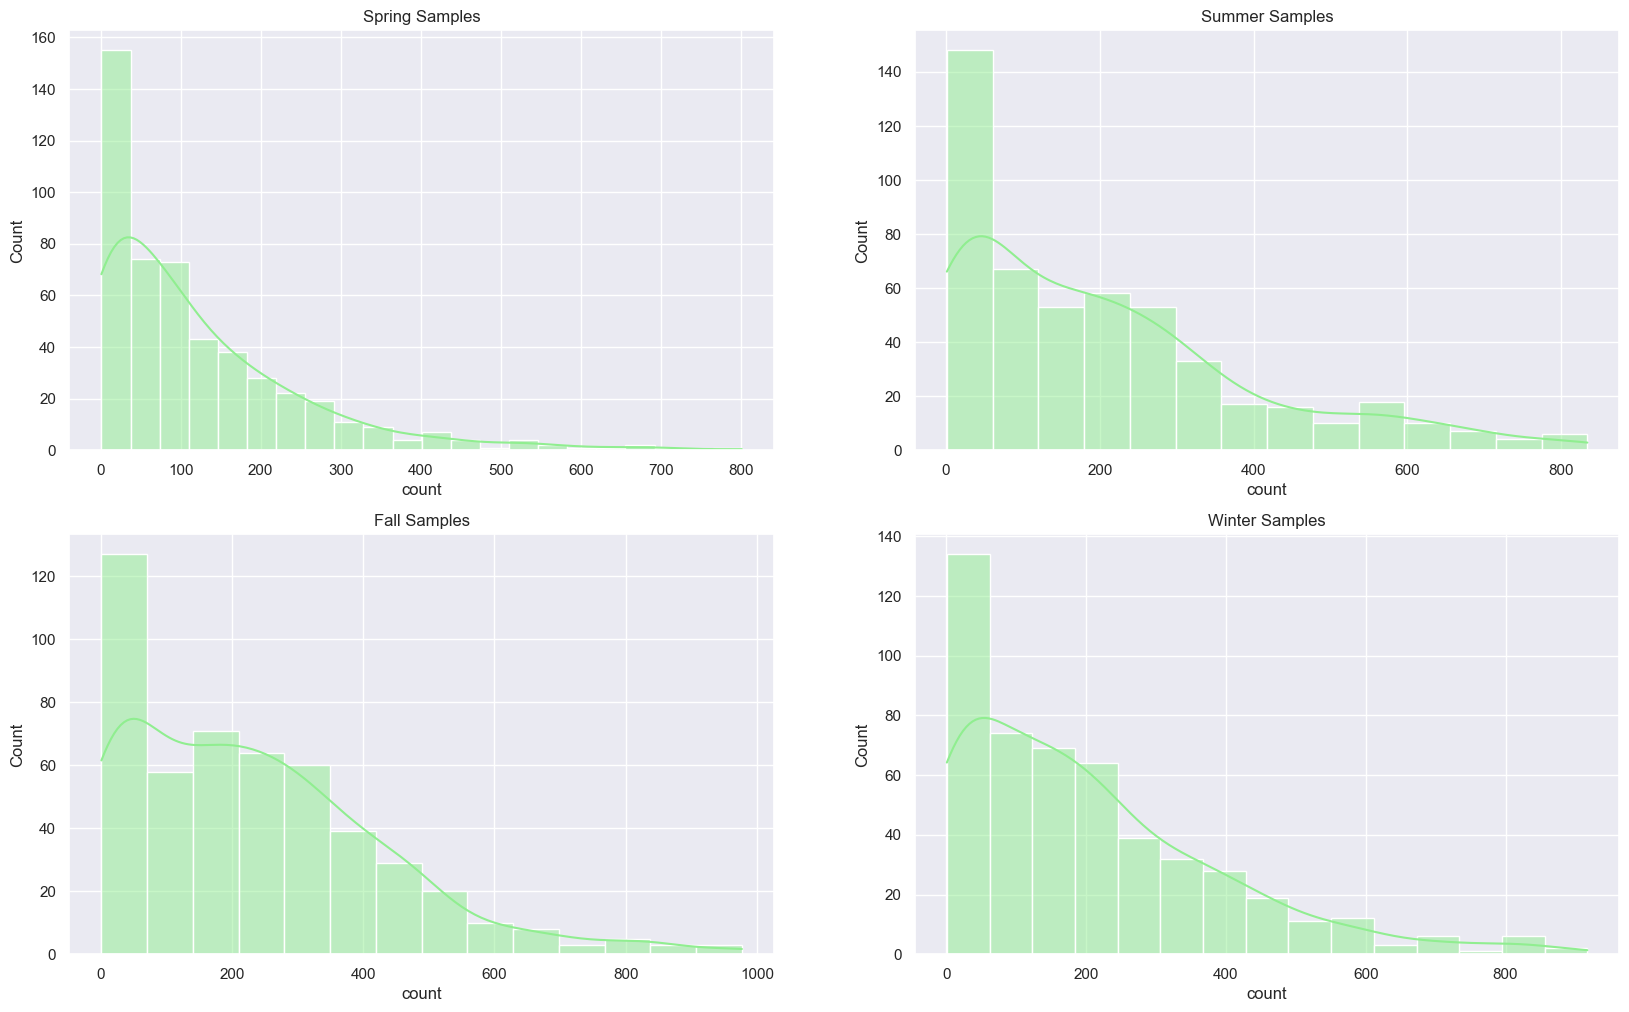

In [54]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
sns.histplot(spring_sample, kde=True, color='#90EE90')
plt.title('Spring Samples')

plt.subplot(2, 2, 2)
sns.histplot(summer_sample, kde=True, color='#90EE90')
plt.title('Summer Samples')

plt.subplot(2, 2, 3)
sns.histplot(fall_sample, kde=True, color='#90EE90')
plt.title('Fall Samples')

plt.subplot(2, 2, 4)
sns.histplot(winter_sample, kde=True, color='#90EE90')
plt.title('Winter Samples')

Through visualisation, we came to know that the distribution of different season is not normal distribution. So, we are going to use log transformation to make it normal distribution.

# Apply Transformation

In [55]:
spring_sample_transformed = np.log(spring_sample)
summer_sample_transformed = np.log(summer_sample)
fall_sample_transformed = np.log(fall_sample)
winter_sample_transformed = np.log(winter_sample)

Text(0.5, 1.0, 'Winter Sample')

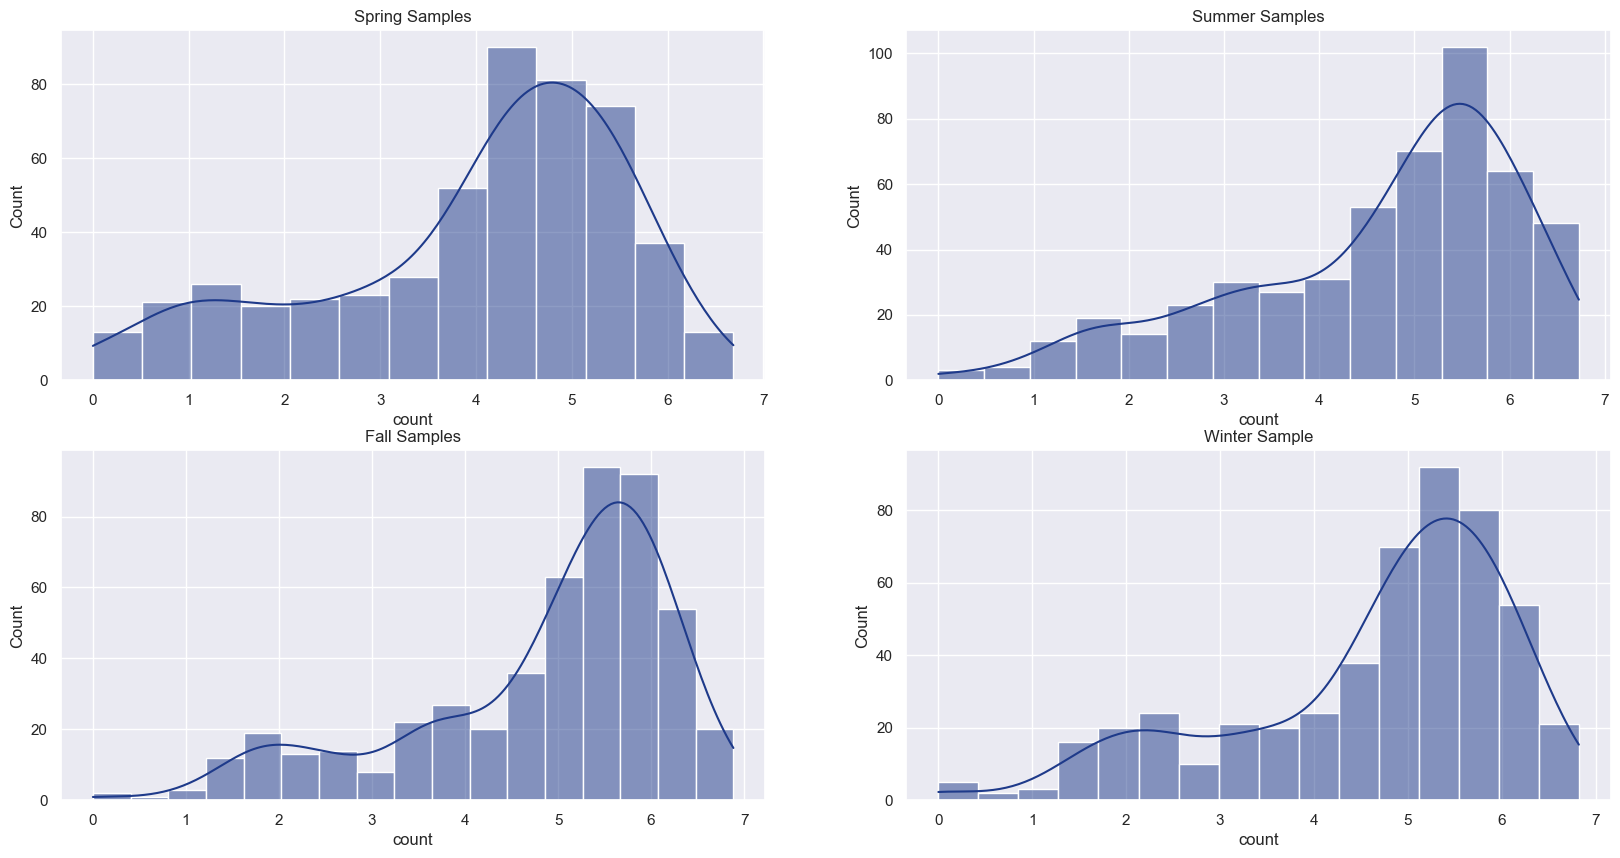

In [56]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.histplot(spring_sample_transformed, kde=True, color='#1E3A8A')
plt.title('Spring Samples', fontsize=12)

plt.subplot(2, 2, 2)
sns.histplot(summer_sample_transformed, kde=True, color='#1E3A8A')
plt.title('Summer Samples', fontsize=12)
plt.subplot(2, 2, 3)
sns.histplot(fall_sample_transformed, kde=True, color='#1E3A8A')
plt.title('Fall Samples')
plt.subplot(2, 2, 4)
sns.histplot(winter_sample_transformed, kde=True, color='#1E3A8A')
plt.title('Winter Sample')

After aplying the transformation on season it shows some improvement to look like a normal distribution but for assuring it we are going to perform shapiro test to check the normal distribution

H0 : The sample follows a normal distribution
Ha: The sample does not follow a normal distribution

In [57]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(spring_sample_transformed)
print('T-test stat: ', test_stat)
print('P value is: ', p_value)
p = 0.05
if p_value< p:
    print('Reject Null Hypothesis:: Spring Samples are not normally distributed')
else:
    print('Failed to reject Null Hypothesis:: Spring Samples are normally distributed')



T-test stat:  0.9181202537737524
P value is:  7.8954807991401015e-16
Reject Null Hypothesis:: Spring Samples are not normally distributed


In [58]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(summer_sample_transformed)
print('T-test stat: ', test_stat)
print('P value is: ', p_value)
p = 0.05
if p_value< p:
    print('Reject Null Hypothesis:: Summer Samples are not normally distributed')
else:
    print('Failed to reject Null Hypothesis:: Summmer Samples are normally distributed')



T-test stat:  0.914900089090942
P value is:  3.712380534402217e-16
Reject Null Hypothesis:: Summer Samples are not normally distributed


In [59]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(fall_sample_transformed)
print('T-test stat: ', test_stat)
print('P value is: ', p_value)
p = 0.05
if p_value< p:
    print('Reject Null Hypothesis:: Fall Samples are not normally distributed')
else:
    print('Failed to reject Null Hypothesis:: Fall Samples are normally distributed')



T-test stat:  0.8811173327327655
P value is:  3.7586732121716384e-19
Reject Null Hypothesis:: Fall Samples are not normally distributed


In [60]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(winter_sample_transformed)
print('T-test stat: ', test_stat)
print('P value is: ', p_value)
p = 0.05
if p_value< p:
    print('Reject Null Hypothesis:: Winter Samples are not normally distributed')
else:
    print('Failed to reject Null Hypothesis:: Winter Samples are normally distributed')

T-test stat:  0.9015635344358255
P value is:  1.9933748629690442e-17
Reject Null Hypothesis:: Winter Samples are not normally distributed


While performing shapiro test we came to know that the data is not normally distributed. 

Now we are going to test Lavene test to check the variance test.

In [61]:
from scipy.stats import levene
test_stat, p_value = levene(spring_sample_transformed, summer_sample_transformed, fall_sample_transformed, winter_sample_transformed)
print('Tstat: ', test_stat)
print('p-value: ', p_value)
alpha=0.05


if p_value<0.05:
    print('Reject Null Hypothesis:: Variance is not equal')
else:
    print('Failed to reject Null Hypothesis:: Variance is equal')

Tstat:  3.2114917873035616
p-value:  0.02215200673834511
Reject Null Hypothesis:: Variance is not equal


The variance are equal for all.

Assumptions for Anova-----
Now we are going to perform the ANOVA test. There are three assumptions, of which two are correct

H0 : The mean number of cycles rented is equal across different weather conditions.
Ha: There is at least one weather condition with a mean number of cycles rented that significantly differs from the others.

In [62]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(spring_sample_transformed, summer_sample_transformed, fall_sample_transformed, winter_sample_transformed)
print('T-test: ', test_stat)
print('p-value: ', p_value)

if p_value < 0.05:
    print('There is at least one weather condition with a mean number of cycles rented that significantly differs from the others.')
else:
    print('The mean number of cycles rented is equal across different weather conditions.')

T-test:  33.054007896170376
p-value:  7.57000010944959e-21
There is at least one weather condition with a mean number of cycles rented that significantly differs from the others.
